In [15]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from csv import reader
import seaborn as sns

In [16]:
df = pd.read_csv('box2hrz-007с.csv')
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,gas_frac,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz
0,860542,28,0,208791.220,203940.950,349847.000,9718,6891,6,1.011170e+15,...,0.125776,0.028659,9.122520,37.872100,102.308640,0.027390,0.027437,-259.72600,-82.91320,-202.92100
1,860543,28,1,314122.000,24372.678,278202.310,14620,15249,15,5.412350e+14,...,0.112946,0.030866,5.959630,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.46200
2,860544,28,2,83855.367,206624.140,144593.690,3903,6766,4,7.260400e+14,...,0.120374,0.022724,6.144960,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.43460
3,860545,28,3,327261.750,233165.060,209430.580,15232,5531,7,6.286450e+14,...,0.116089,0.027928,6.192280,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.92500
4,860546,28,4,183444.060,193161.880,332979.030,8538,7393,6,2.217660e+14,...,0.116187,0.026047,3.689910,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.89900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,870966,28,15074,304444.090,76153.484,125475.130,14170,12839,15,7.152720e+12,...,0.044805,0.034122,0.390212,0.003211,0.299250,0.317329,0.082210,333.19500,172.07700,70.60560
10425,870967,28,15240,165232.340,66270.766,57933.605,7690,13299,13,7.388280e+12,...,0.054074,0.034059,0.387234,0.007786,0.362322,0.453900,0.090051,-99.56510,104.02400,142.64100
10426,870968,28,15272,272347.840,305951.750,303981.470,12676,2143,3,7.231790e+12,...,0.033251,0.032024,0.447326,0.001472,0.255544,0.001987,0.043893,-333.16800,-55.94300,261.41000
10427,870969,28,15289,111759.160,122749.100,339429.380,5201,10670,9,7.085930e+12,...,0.055285,0.030725,0.341775,0.007282,0.322402,0.242687,0.121855,75.08240,19.83800,-7.41744


In [17]:
df['fossil'] = 'no'
df.loc[(df.M_sat_M_cD<=0.22)&(df.Lx_ergs>=0.1),'fossil']='yes'
## здесь используется критерий из диссертации Ragagnin
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz,fossil
0,860542,28,0,208791.220,203940.950,349847.000,9718,6891,6,1.011170e+15,...,0.028659,9.122520,37.872100,102.308640,0.027390,0.027437,-259.72600,-82.91320,-202.92100,yes
1,860543,28,1,314122.000,24372.678,278202.310,14620,15249,15,5.412350e+14,...,0.030866,5.959630,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.46200,yes
2,860544,28,2,83855.367,206624.140,144593.690,3903,6766,4,7.260400e+14,...,0.022724,6.144960,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.43460,yes
3,860545,28,3,327261.750,233165.060,209430.580,15232,5531,7,6.286450e+14,...,0.027928,6.192280,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.92500,yes
4,860546,28,4,183444.060,193161.880,332979.030,8538,7393,6,2.217660e+14,...,0.026047,3.689910,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.89900,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,870966,28,15074,304444.090,76153.484,125475.130,14170,12839,15,7.152720e+12,...,0.034122,0.390212,0.003211,0.299250,0.317329,0.082210,333.19500,172.07700,70.60560,no
10425,870967,28,15240,165232.340,66270.766,57933.605,7690,13299,13,7.388280e+12,...,0.034059,0.387234,0.007786,0.362322,0.453900,0.090051,-99.56510,104.02400,142.64100,no
10426,870968,28,15272,272347.840,305951.750,303981.470,12676,2143,3,7.231790e+12,...,0.032024,0.447326,0.001472,0.255544,0.001987,0.043893,-333.16800,-55.94300,261.41000,no
10427,870969,28,15289,111759.160,122749.100,339429.380,5201,10670,9,7.085930e+12,...,0.030725,0.341775,0.007282,0.322402,0.242687,0.121855,75.08240,19.83800,-7.41744,no


In [18]:
cl = df.copy()
cl['M500_msolh'] = np.log10(cl['M500_msolh'])
cl['T_kev'] = np.log10(cl['T_kev'])
cl['Lx_ergs'] = np.log10(cl['Lx_ergs'])
cl['Y500c'] = np.log10(cl['Y500c'])


cl

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz,fossil
0,860542,28,0,208791.220,203940.950,349847.000,9718,6891,6,15.004824,...,0.028659,0.960115,1.578319,2.009912,0.027390,0.027437,-259.72600,-82.91320,-202.92100,yes
1,860543,28,1,314122.000,24372.678,278202.310,14620,15249,15,14.733386,...,0.030866,0.775219,0.898423,1.687803,0.111877,0.011779,-282.64600,1.06033,-293.46200,yes
2,860544,28,2,83855.367,206624.140,144593.690,3903,6766,4,14.860961,...,0.022724,0.788519,1.062717,1.771286,0.085323,0.063623,-40.43990,-160.57900,-72.43460,yes
3,860545,28,3,327261.750,233165.060,209430.580,15232,5531,7,14.798405,...,0.027928,0.791851,1.541992,1.738029,0.063246,0.037204,-9.51925,251.43900,-118.92500,yes
4,860546,28,4,183444.060,193161.880,332979.030,8538,7393,6,14.345895,...,0.026047,0.567016,0.321644,1.362738,0.216284,0.028688,870.24200,617.94800,-509.89900,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,870966,28,15074,304444.090,76153.484,125475.130,14170,12839,15,12.854471,...,0.034122,-0.408699,-2.493315,-0.523966,0.317329,0.082210,333.19500,172.07700,70.60560,no
10425,870967,28,15240,165232.340,66270.766,57933.605,7690,13299,13,12.868543,...,0.034059,-0.412027,-2.108688,-0.440906,0.453900,0.090051,-99.56510,104.02400,142.64100,no
10426,870968,28,15272,272347.840,305951.750,303981.470,12676,2143,3,12.859246,...,0.032024,-0.349376,-2.832007,-0.592534,0.001987,0.043893,-333.16800,-55.94300,261.41000,no
10427,870969,28,15289,111759.160,122749.100,339429.380,5201,10670,9,12.850397,...,0.030725,-0.466260,-2.137744,-0.491602,0.242687,0.121855,75.08240,19.83800,-7.41744,no


9804
625


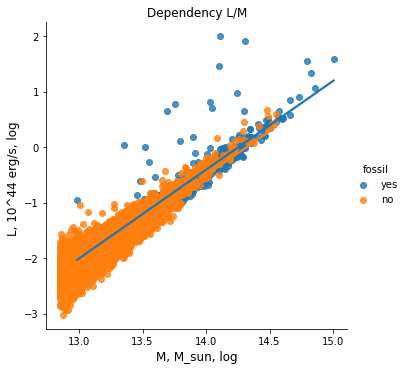

In [19]:
sns.lmplot(x = 'M500_msolh', y = 'Lx_ergs', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('L, 10^44 erg/s, log ', fontsize=12)
plt.title ('Dependency L/M')
plt.savefig('L-M.png')

print (len(cl[(cl.fossil == 'no')]))
print (len(cl[(cl.fossil == 'yes')]))

In [20]:
##отсеим
cl.drop(cl[cl.M500_msolh < 13.5].index, inplace=True)
#cl.drop(cl[cl.M500_msolh > 34].index, inplace=True)
#df.drop(df[df.Lx_ergs > 20].index, inplace=True)
cl = cl.reset_index(drop=True)
cl

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz,fossil
0,860542,28,0,208791.220,203940.950,349847.0000,9718,6891,6,15.004824,...,0.028659,0.960115,1.578319,2.009912,0.027390,0.027437,-259.72600,-82.91320,-202.9210,yes
1,860543,28,1,314122.000,24372.678,278202.3100,14620,15249,15,14.733386,...,0.030866,0.775219,0.898423,1.687803,0.111877,0.011779,-282.64600,1.06033,-293.4620,yes
2,860544,28,2,83855.367,206624.140,144593.6900,3903,6766,4,14.860961,...,0.022724,0.788519,1.062717,1.771286,0.085323,0.063623,-40.43990,-160.57900,-72.4346,yes
3,860545,28,3,327261.750,233165.060,209430.5800,15232,5531,7,14.798405,...,0.027928,0.791851,1.541992,1.738029,0.063246,0.037204,-9.51925,251.43900,-118.9250,yes
4,860546,28,4,183444.060,193161.880,332979.0300,8538,7393,6,14.345895,...,0.026047,0.567016,0.321644,1.362738,0.216284,0.028688,870.24200,617.94800,-509.8990,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,862981,28,2440,90735.453,79530.023,349979.1600,4223,12682,13,13.518540,...,0.030298,0.063296,-1.267798,0.333170,0.203722,0.088741,-306.16800,-259.23700,-238.3570,no
1508,863048,28,2509,133566.840,252393.580,9162.6074,6216,4636,5,13.549192,...,0.026273,-0.017620,-1.057855,0.295839,0.159104,0.080344,135.81400,-320.82600,-207.7780,no
1509,863116,28,2577,253364.050,210631.500,54857.3090,11792,6580,6,13.548818,...,0.025487,0.022197,-1.003602,0.368725,0.371641,0.092072,-268.93100,-265.55500,-101.1440,no
1510,863268,28,2729,209765.880,327212.190,292273.5000,9763,1153,2,13.521879,...,0.026525,0.000100,-1.088641,0.342954,0.198966,0.058027,672.49200,413.61100,-191.9870,no


891
621


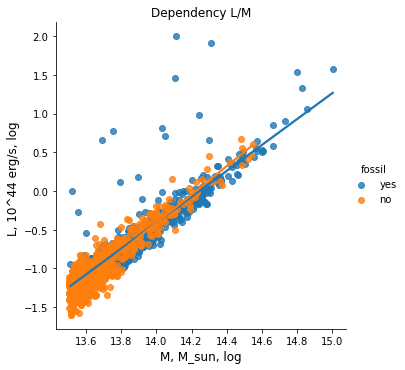

In [21]:
sns.lmplot(x = 'M500_msolh', y = 'Lx_ergs', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('L, 10^44 erg/s, log ', fontsize=12)
plt.title ('Dependency L/M')
plt.savefig('L-M.png')

print (len(cl[(cl.fossil == 'no')]))
print (len(cl[(cl.fossil == 'yes')]))

In [22]:
cl['fossil'] = 'no'
cl.loc[(cl.M_sat_M_cD<=0.1)&(cl.Lx_ergs>=(-1)),'fossil']='yes'
cl

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz,fossil
0,860542,28,0,208791.220,203940.950,349847.0000,9718,6891,6,15.004824,...,0.028659,0.960115,1.578319,2.009912,0.027390,0.027437,-259.72600,-82.91320,-202.9210,yes
1,860543,28,1,314122.000,24372.678,278202.3100,14620,15249,15,14.733386,...,0.030866,0.775219,0.898423,1.687803,0.111877,0.011779,-282.64600,1.06033,-293.4620,no
2,860544,28,2,83855.367,206624.140,144593.6900,3903,6766,4,14.860961,...,0.022724,0.788519,1.062717,1.771286,0.085323,0.063623,-40.43990,-160.57900,-72.4346,yes
3,860545,28,3,327261.750,233165.060,209430.5800,15232,5531,7,14.798405,...,0.027928,0.791851,1.541992,1.738029,0.063246,0.037204,-9.51925,251.43900,-118.9250,yes
4,860546,28,4,183444.060,193161.880,332979.0300,8538,7393,6,14.345895,...,0.026047,0.567016,0.321644,1.362738,0.216284,0.028688,870.24200,617.94800,-509.8990,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,862981,28,2440,90735.453,79530.023,349979.1600,4223,12682,13,13.518540,...,0.030298,0.063296,-1.267798,0.333170,0.203722,0.088741,-306.16800,-259.23700,-238.3570,no
1508,863048,28,2509,133566.840,252393.580,9162.6074,6216,4636,5,13.549192,...,0.026273,-0.017620,-1.057855,0.295839,0.159104,0.080344,135.81400,-320.82600,-207.7780,no
1509,863116,28,2577,253364.050,210631.500,54857.3090,11792,6580,6,13.548818,...,0.025487,0.022197,-1.003602,0.368725,0.371641,0.092072,-268.93100,-265.55500,-101.1440,no
1510,863268,28,2729,209765.880,327212.190,292273.5000,9763,1153,2,13.521879,...,0.026525,0.000100,-1.088641,0.342954,0.198966,0.058027,672.49200,413.61100,-191.9870,no


1194
318


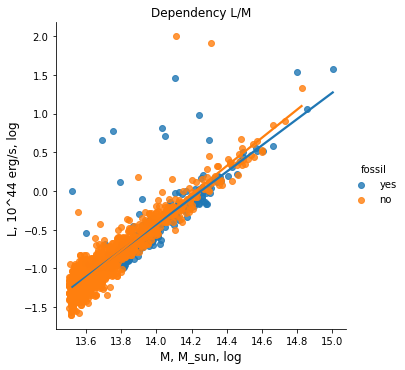

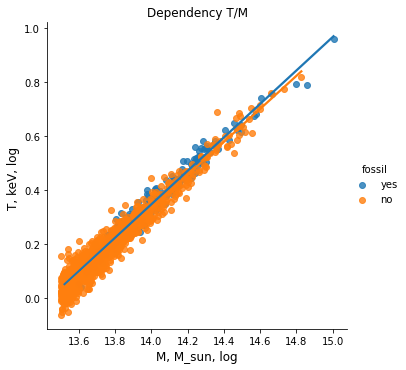

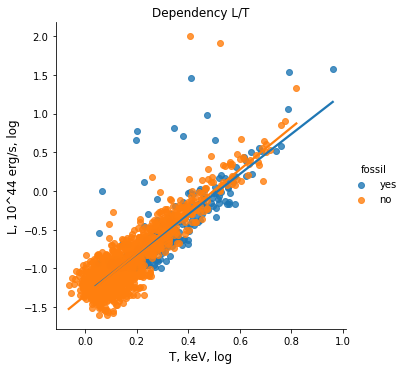

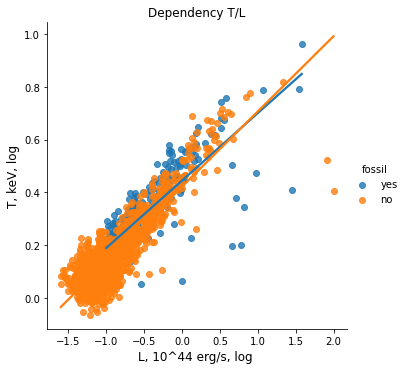

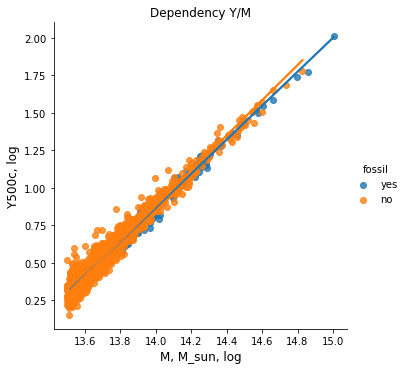

In [23]:
sns.lmplot(x = 'M500_msolh', y = 'Lx_ergs', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('L, 10^44 erg/s, log ', fontsize=12)
plt.title ('Dependency L/M')
plt.savefig('L-M.png')

print (len(cl[(cl.fossil == 'no')]))
print (len(cl[(cl.fossil == 'yes')]))

sns.lmplot(x = 'M500_msolh', y = 'T_kev', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('T, keV, log ', fontsize=12)
plt.title ('Dependency T/M')
plt.savefig('T-M.png')

sns.lmplot(x = 'T_kev', y = 'Lx_ergs', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('T, keV, log',fontsize=12)
plt.ylabel('L, 10^44 erg/s, log', fontsize=12)
plt.title ('Dependency L/T')
#plt.savefig('T-L.png')

sns.lmplot(x = 'Lx_ergs', y = 'T_kev', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('L, 10^44 erg/s, log ',fontsize=12)
plt.ylabel('T, keV, log', fontsize=12)
plt.title ('Dependency T/L')
plt.savefig('T-L.png')

sns.lmplot(x = 'M500_msolh', y = 'Y500c', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('Y500c, log', fontsize=12)
plt.title ('Dependency Y/M')
plt.savefig('Y-M.png')

Text(0.5, 1.0, 'Dependency L/T')

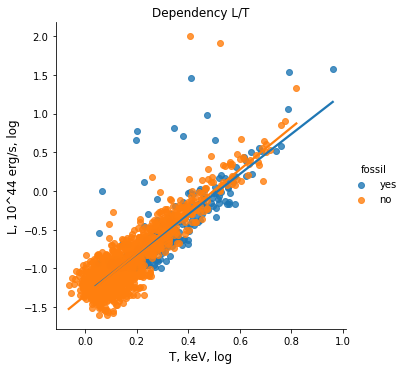

In [24]:
sns.lmplot(x = 'T_kev', y = 'Lx_ergs', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('T, keV, log',fontsize=12)
plt.ylabel('L, 10^44 erg/s, log', fontsize=12)
plt.title ('Dependency L/T')


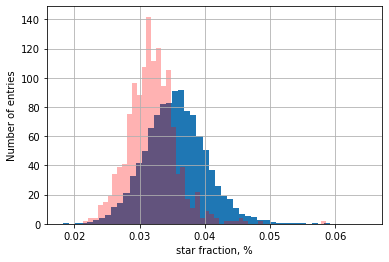

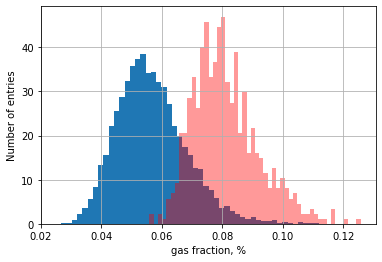

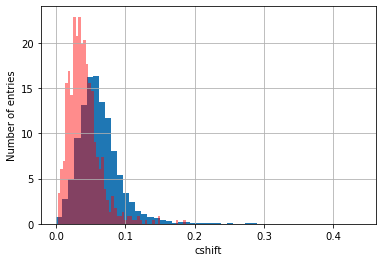

In [25]:
df.star_frac[(df.fossil=='no')].hist(bins = 50, density = True)
df.star_frac[(df.fossil=='yes')].hist(bins = 50, alpha = 0.3, color = 'red', density = True)
plt.xlabel(r'star fraction, %')
plt.ylabel(r'Number of entries')
#plt.legend(loc='best')
plt.show()

df.gas_frac[(df.fossil=='no')].hist(bins = 50, density = True)
df.gas_frac[(df.fossil=='yes')].hist(bins = 50, alpha = 0.4, color = 'red', density = True)
plt.xlabel(r'gas fraction, %')
plt.ylabel(r'Number of entries')
#plt.legend(loc='best')
plt.show()

df.cshift[(df.fossil=='no')].hist(bins = 50, density = True)
df.cshift[(df.fossil=='yes')].hist(bins = 50, alpha = 0.45, color = 'red', density = True)
plt.xlabel(r'cshift')
plt.ylabel(r'Number of entries')
#plt.legend(loc='best')
plt.show()

In [26]:
import glob

path = 'new' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    
    df = pd.read_csv(filename, usecols = ['M_sat_M_cD'], header=0)
    df['name'] = filename
    li.append(df)
    #print(df)
    

frame = pd.concat(li, axis=0, ignore_index=True)
frame['fos'] = 1/frame.M_sat_M_cD

frame

,M_sat_M_cD,name,fos
0,0.501558,new/box2_M13.55_z1_48.csv,1.993787
1,0.067461,new/box2_M13.55_z1_48.csv,14.823335
2,0.297822,new/box2_M13.55_z1_48.csv,3.357710
3,0.449564,new/box2_M13.55_z1_48.csv,2.224377
4,0.689831,new/box2_M13.55_z1_48.csv,1.449630
...,...,...,...
2162,0.024076,new/box2_M13.55_z0_03.csv,41.534449
2163,0.150478,new/box2_M13.55_z0_03.csv,6.645490
2164,0.400858,new/box2_M13.55_z0_03.csv,2.494649
2165,0.060787,new/box2_M13.55_z0_03.csv,16.451021


In [29]:
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)


for filename in all_files:

    fig = px.histogram(frame.fos[(frame.name==filename)], nbins= len(frame.fos[(frame.name==filename)]), title = filename)
    fig.update_layout(autosize=False, width=1000, height=500, xaxis_range=[0,40])
    fig.show()
    print('median fossilness value = ', frame.fos[(frame.name==filename)].median(), 'Median galaxy ratio =', frame.M_sat_M_cD[(frame.name==filename)].median())


median fossilness value =  4.857648445349416 Median galaxy ratio = 0.2058625


median fossilness value =  4.492153984825915 Median galaxy ratio = 0.222622


median fossilness value =  4.450180232299409 Median galaxy ratio = 0.22471


median fossilness value =  7.0648642211169275 Median galaxy ratio = 0.141546


median fossilness value =  3.8321253611239112 Median galaxy ratio = 0.260959


median fossilness value =  5.363411352829857 Median galaxy ratio = 0.18644850000000002


median fossilness value =  5.784862850628751 Median galaxy ratio = 0.17286600000000002


median fossilness value =  8.058602154870215 Median galaxy ratio = 0.124091


median fossilness value =  8.479822262925369 Median galaxy ratio = 0.117927
